In [1]:
pip install scikit-learn pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


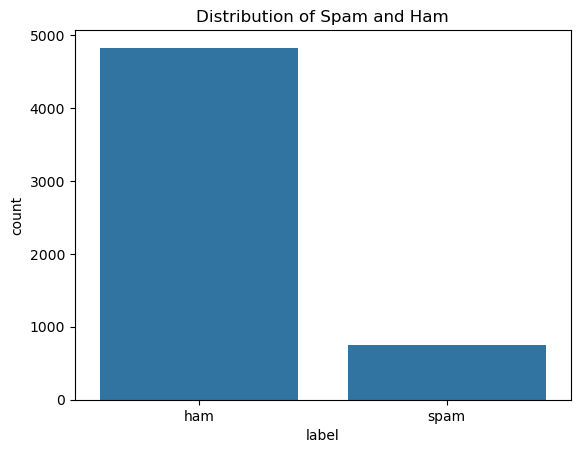

Accuracy: 98.83%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



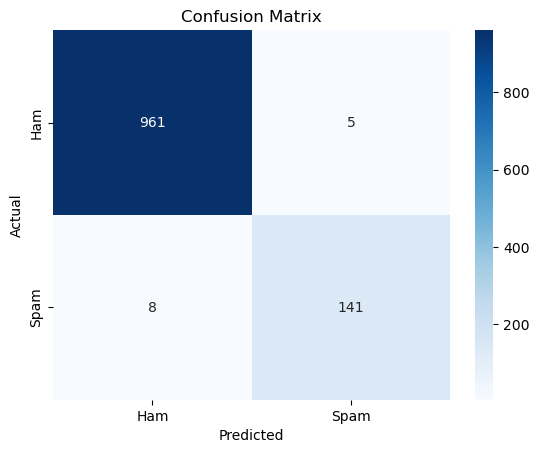

['vectorizer.pkl']

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Downloading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Unzipping the file and loading the data
import zipfile
import os
import requests

# Downloading the zip file
response = requests.get(url)
zip_path = 'smsspamcollection.zip'
with open(zip_path, 'wb') as f:
    f.write(response.content)

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("smsspamcollection")

# Reading the data into a pandas DataFrame
data_path = "smsspamcollection/SMSSpamCollection"
data = pd.read_csv(data_path, sep='\t', header=None, names=["label", "message"])

# Checking the first few rows of the dataset
print(data.head())

# Checking the distribution of spam and ham (non-spam) messages
sns.countplot(data=data, x='label')
plt.title('Distribution of Spam and Ham')
plt.show()

# Data Preprocessing
# Converting labels to binary (spam: 1, ham: 0)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Splitting data into features (X) and target (y)
X = data['message']
y = data['label']

# Train-test split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data and transform the test data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Training the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generating the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Saving the model (Optional)
import joblib
joblib.dump(model, "spam_classifier_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")